In [2]:
#!pip install dask[complete]

#Using DASK

In [3]:
import os
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt

In [4]:
os.chdir("C:\\Users\\HP\\Desktop\\code challenges\\datasets")

In [5]:
df = pd.read_csv("train_nyc_taxi.csv")

In [6]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
df.shape

(1458644, 11)

In [8]:
df['pickup_datetime'] = dd.to_datetime(df['pickup_datetime'])

In [9]:
january_rides = df[df['pickup_datetime'].dt.month == 1]

In [10]:
daily_avg_duration = january_rides.groupby(january_rides['pickup_datetime'].dt.date)['trip_duration'].mean()

In [11]:
daily_avg_duration

pickup_datetime
2016-01-01     920.679978
2016-01-02     840.084767
2016-01-03     924.667086
2016-01-04     851.118662
2016-01-05    1455.344808
2016-01-06     838.498303
2016-01-07     832.135704
2016-01-08     872.034877
2016-01-09     808.494637
2016-01-10     749.059163
2016-01-11     864.974024
2016-01-12     853.027200
2016-01-13     857.456818
2016-01-14     905.232693
2016-01-15     943.433072
2016-01-16     889.682392
2016-01-17     884.656571
2016-01-18     715.627764
2016-01-19     956.777918
2016-01-20     904.585433
2016-01-21     910.767403
2016-01-22     934.412834
2016-01-23    1026.549757
2016-01-24     902.189477
2016-01-25    1138.146121
2016-01-26    1226.126063
2016-01-27    1040.240259
2016-01-28    1023.078354
2016-01-29     939.028735
2016-01-30     865.482108
2016-01-31     882.888657
Name: trip_duration, dtype: float64

In [12]:
#the number of trips per day in January
daily_trip_count = january_rides.groupby(january_rides['pickup_datetime'].dt.date)['id'].count()
print(daily_trip_count)

pickup_datetime
2016-01-01    7162
2016-01-02    6512
2016-01-03    6353
2016-01-04    6725
2016-01-05    7204
2016-01-06    7365
2016-01-07    7649
2016-01-08    8229
2016-01-09    8578
2016-01-10    7454
2016-01-11    7276
2016-01-12    7794
2016-01-13    8360
2016-01-14    8277
2016-01-15    8539
2016-01-16    8797
2016-01-17    7891
2016-01-18    7146
2016-01-19    7934
2016-01-20    8018
2016-01-21    8375
2016-01-22    8805
2016-01-23    1648
2016-01-24    3383
2016-01-25    6084
2016-01-26    6941
2016-01-27    7571
2016-01-28    8066
2016-01-29    8735
2016-01-30    9166
2016-01-31    7670
Name: id, dtype: int64


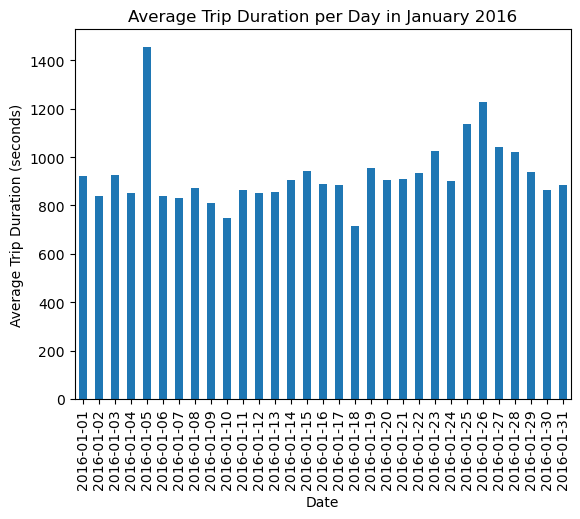

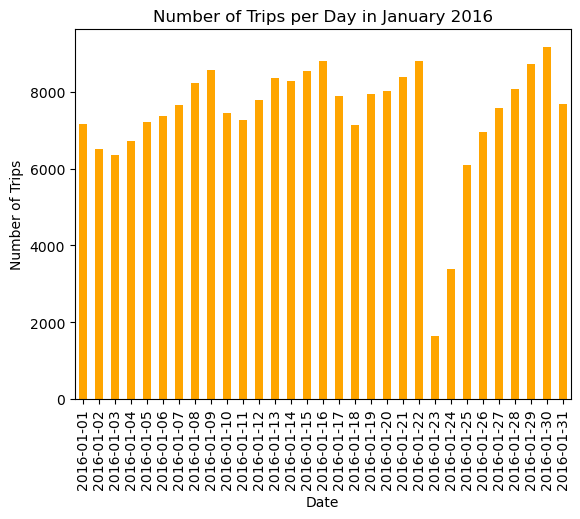

In [13]:
daily_avg_duration.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Average Trip Duration (seconds)')
plt.title('Average Trip Duration per Day in January 2016')
plt.show()


daily_trip_count.plot(kind='bar', color='orange')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Day in January 2016')
plt.show()

In [14]:
#!pip install vaex

In [ ]:
#Using vaex

In [15]:
import vaex

In [ ]:
#!pip install --upgrade typing_extensions


In [ ]:
#!pip install --upgrade vaex dask


In [ ]:
#conda update --all


In [18]:
df_vaex = vaex.from_csv('train_nyc_taxi.csv', convert=True) 

In [19]:
print(df_vaex.head(5))

  #  id           vendor_id  pickup_datetime      dropoff_datetime       passenger_count    pickup_longitude    pickup_latitude    dropoff_longitude    dropoff_latitude  store_and_fwd_flag      trip_duration
  0  id2875421            2  2016-03-14 17:24:55  2016-03-14 17:32:30                  1            -73.9822            40.7679             -73.9646             40.7656  N                                 455
  1  id2377394            1  2016-06-12 00:43:35  2016-06-12 00:54:38                  1            -73.9804            40.7386             -73.9995             40.7312  N                                 663
  2  id3858529            2  2016-01-19 11:35:24  2016-01-19 12:10:48                  1            -73.979             40.7639             -74.0053             40.7101  N                                2124
  3  id3504673            2  2016-04-06 19:32:31  2016-04-06 19:39:40                  1            -74.01              40.72               -74.0123             40.7067

In [20]:
df_vaex['pickup_datetime'] = df_vaex['pickup_datetime'].astype('datetime64[ns]')

In [21]:
january_rides_vaex = df_vaex[df_vaex['pickup_datetime'].dt.month == 1]

In [22]:
daily_avg_duration_vaex = january_rides_vaex.groupby(january_rides_vaex['pickup_datetime'].dt.date, agg={'avg_duration': vaex.agg.mean('trip_duration')})

In [23]:
print(daily_avg_duration_vaex)

#    dt_date(pickup_datetime)    avg_duration
0    2016-01-22                  934.4128336172629
1    2016-01-16                  889.6823917244515
2    2016-01-20                  904.5854327762535
3    2016-01-02                  840.0847665847666
4    2016-01-23                  1026.5497572815534
...  ...                         ...
26   2016-01-30                  865.4821077896574
27   2016-01-14                  905.2326930047119
28   2016-01-29                  939.0287349742415
29   2016-01-31                  882.8886571056063
30   2016-01-24                  902.1894767957434


In [24]:
daily_trip_count_vaex = january_rides_vaex.groupby(january_rides_vaex['pickup_datetime'].dt.date, agg={'trip_count': vaex.agg.count('id')})

In [25]:
print(daily_trip_count_vaex)

#    dt_date(pickup_datetime)    trip_count
0    2016-01-22                  8805
1    2016-01-16                  8797
2    2016-01-20                  8018
3    2016-01-02                  6512
4    2016-01-23                  1648
...  ...                         ...
26   2016-01-30                  9166
27   2016-01-14                  8277
28   2016-01-29                  8735
29   2016-01-31                  7670
30   2016-01-24                  3383


In [32]:
daily_avg_duration_vaex.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Average Trip Duration (seconds)')
plt.title('Average Trip Duration per Day in January 2016')
plt.show()


daily_trip_count_vaex.plot(kind='bar', color='orange')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Day in January 2016')
plt.show()

TypeError: heatmap() got an unexpected keyword argument 'kind'